## Get Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [125]:
from tensorflow.python.client import device_lib


device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15738030621999974976
 xla_global_id: -1]

In [126]:
print(os.listdir("../input/jobposts"))

['data job posts.csv', 'screenshot.jpg']


In [2]:
nRowsRead = None  # specify 'None' if want to read whole file
# data job posts.csv has 19001 rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv("./data_job_posts.csv", delimiter=",", nrows=nRowsRead)
df.dataframeName = "data_job_posts.csv"
nRow, nCol = df.shape
print(f"There are {nRow} rows and {nCol} columns")

/Users/aravindnarayanan/Documents/unified-xai-evaluation-framework/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


There are 19001 rows and 24 columns


In [3]:
df.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [129]:
# Check which columns are present
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

## Data clean up + Preprocessing

In [130]:
# Keep only what we need
text_cols = ["Title", "JobDescription", "JobRequirment", "RequiredQual"]
label_col = "IT"

df = df[text_cols + [label_col]].copy()

## Drop any that has no column
df.dropna(subset=text_cols, inplace=True)
nRow, nCol = df.shape

print(f"There are {nRow} rows and {nCol} columns")

df[label_col] = df[label_col].astype(int)

df.head()

There are 13124 rows and 5 columns


,Title,JobDescription,JobRequirment,RequiredQual,IT
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",0
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",0
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",0
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,0
17,Country Economist (NOB),The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\r\n- Mi...,0


In [131]:
# pd.set_option("display.max_colwidth", None)

# mask = (
#     df["JobDescription"].str.contains("development", case=False, na=False) |
#     df["Title"].str.contains("development", case=False, na=False)
# )

# df.loc[mask].head(5)

In [132]:
# df["full_text"] = (
#     "TITLE: " + df["Title"] + " "
#     "DESCRIPTION: " + df["JobDescription"] + " "
#     "REQUIREMENTS: " + df["JobRequirment"] + " "
#     "QUALIFICATIONS: " + df["RequiredQual"]
# )

df["full_text"] = (
    df["Title"]
    + " \n "
    + df["JobDescription"]
    + " \n "
    + df["JobRequirment"]
    + " \n "
    + df["RequiredQual"]
).str.lower()

In [133]:
df.head()

,Title,JobDescription,JobRequirment,RequiredQual,IT,full_text
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",0,chief financial officer \n ameria investment c...
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",0,country coordinator \n public outreach and str...
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",0,bcc specialist \n the lead (local enhancement ...
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,0,"community development, capacity building and c..."
17,Country Economist (NOB),The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\r\n- Mi...,0,country economist (nob) \n the united nations ...


In [134]:
df["IT"].value_counts(normalize=True)

IT
0    0.786422
1    0.213578
Name: proportion, dtype: float64

In [135]:
df["text_len"] = df["full_text"].str.split().apply(len)
df["text_len"].describe()

count    13124.000000
mean       237.212588
std        152.786149
min         24.000000
25%        143.000000
50%        199.000000
75%        283.000000
max       1802.000000
Name: text_len, dtype: float64

In [136]:
df["text_len"] = df["full_text"].str.split().str.len()

In [137]:
df.head()

,Title,JobDescription,JobRequirment,RequiredQual,IT,full_text,text_len
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",0,chief financial officer \n ameria investment c...,721
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",0,country coordinator \n public outreach and str...,138
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",0,bcc specialist \n the lead (local enhancement ...,507
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,0,"community development, capacity building and c...",191
17,Country Economist (NOB),The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\r\n- Mi...,0,country economist (nob) \n the united nations ...,273


In [138]:
# length quantiles (robust to heavy tail)
# do s.t. train/val/test have similar distributions of document lengths
# No split is biased toward short or long postings

df["len_bin"] = pd.qcut(df["text_len"], q=6, duplicates="drop")

# joint strata
df["strata"] = df["IT"].astype(str) + "_" + df["len_bin"].astype(str)

In [139]:
df.groupby("IT")["text_len"].describe()

,count,mean,std,min,25%,50%,75%,max
IT,,,,,,,,
0,10321.0,245.689274,162.209086,24.0,144.0,204.0,294.0,1802.0
1,2803.0,206.000357,105.738646,25.0,140.0,183.0,245.0,1265.0


In [140]:
df.head()

,Title,JobDescription,JobRequirment,RequiredQual,IT,full_text,text_len,len_bin,strata
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",0,chief financial officer \n ameria investment c...,721,"(334.0, 1802.0]","0_(334.0, 1802.0]"
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",0,country coordinator \n public outreach and str...,138,"(124.0, 160.333]","0_(124.0, 160.333]"
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",0,bcc specialist \n the lead (local enhancement ...,507,"(334.0, 1802.0]","0_(334.0, 1802.0]"
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,0,"community development, capacity building and c...",191,"(160.333, 199.0]","0_(160.333, 199.0]"
17,Country Economist (NOB),The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\r\n- Mi...,0,country economist (nob) \n the united nations ...,273,"(249.0, 334.0]","0_(249.0, 334.0]"


In [141]:
from sklearn.model_selection import train_test_split


train_df, temp_df = train_test_split(
    df, test_size=0.3, stratify=df["strata"], random_state=42
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["strata"], random_state=42
)

In [142]:
## Remove helper columns
for split in [train_df, val_df, test_df]:
    split.drop(columns=["len_bin", "strata"], inplace=True)

In [143]:
df.head()

,Title,JobDescription,JobRequirment,RequiredQual,IT,full_text,text_len,len_bin,strata
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",0,chief financial officer \n ameria investment c...,721,"(334.0, 1802.0]","0_(334.0, 1802.0]"
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",0,country coordinator \n public outreach and str...,138,"(124.0, 160.333]","0_(124.0, 160.333]"
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",0,bcc specialist \n the lead (local enhancement ...,507,"(334.0, 1802.0]","0_(334.0, 1802.0]"
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,0,"community development, capacity building and c...",191,"(160.333, 199.0]","0_(160.333, 199.0]"
17,Country Economist (NOB),The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\r\n- Mi...,0,country economist (nob) \n the united nations ...,273,"(249.0, 334.0]","0_(249.0, 334.0]"


In [144]:
# # Global max length
# MAX_LEN = 512  # or 768

# # Truncate Uniformly
# def truncate(text, max_len=MAX_LEN):
#     return " ".join(text.split()[:max_len])

# for split in [train_df, val_df, test_df]:
#     split["full_text"] = split["full_text"].apply(truncate)

In [145]:
# Handle label imbalance via loss weighting

from sklearn.utils.class_weight import compute_class_weight


y_train = train_df["IT"].values

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)

class_weight = {0: class_weights[0], 1: class_weights[1]}

In [146]:
# Sanity Checks...
for name, split in zip(["train", "val", "test"], [train_df, val_df, test_df]):
    print(name, split["IT"].value_counts(normalize=True))


for name, split in zip(["train", "val", "test"], [train_df, val_df, test_df]):
    print(name, split.groupby("IT")["text_len"].mean())

train IT
0    0.786523
1    0.213477
Name: proportion, dtype: float64
val IT
0    0.786186
1    0.213814
Name: proportion, dtype: float64
test IT
0    0.786186
1    0.213814
Name: proportion, dtype: float64
train IT
0    245.473495
1    207.067823
Name: text_len, dtype: float64
val IT
0    248.230620
1    204.387173
Name: text_len, dtype: float64
test IT
0    244.155039
1    202.641330
Name: text_len, dtype: float64


In [147]:
from sklearn.linear_model import LogisticRegression


X = train_df[["text_len"]]
y = train_df["IT"]

clf = LogisticRegression().fit(X, y)

In [148]:
X_test = test_df[["text_len"]]
y_test = test_df["IT"]
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7862


In [149]:
y_perm = np.random.permutation(train_df["IT"])
clf_perm = LogisticRegression().fit(X, y_perm)
print(clf_perm.score(X_test, y_test))

0.7861858811579482


In [150]:
# Permutation Feature Importance (bias check)
# verify the model is not relying on text length.
# Add length as a feature (explicit test)
train_len = train_df["text_len"].values.reshape(-1, 1)
test_len = test_df["text_len"].values.reshape(-1, 1)

# Train a length-only model:
len_clf = LogisticRegression().fit(train_len, train_df["IT"])
print("Length-only accuracy:", len_clf.score(test_len, test_df["IT"]))
# => Should be ≈ majority baseline.

Length-only accuracy: 0.7861858811579482


Mitigate label imbalance and text-length–induced confounding through joint stratification on class labels and length quantiles, followed by uniform post-split truncation. A length-only classifier performs at majority-class baseline, indicating that document length does not constitute a predictive shortcut.

## LR (model 1)

In [151]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from lime.lime_text import LimeTextExplainer
from scipy.special import expit  # sigmoid
from scipy.stats import spearmanr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

In [152]:
text_clf = Pipeline(
    [
        (
            "tfidf",
            TfidfVectorizer(
                ngram_range=(1, 2), min_df=5, max_df=0.9, stop_words="english"
            ),
        ),
        ("clf", LogisticRegression(max_iter=500, class_weight=class_weight)),
    ]
)

text_clf.fit(train_df["full_text"], train_df["IT"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf',
                 LogisticRegression(class_weight={0: np.float64(0.6357093425605537),
                                                  1: np.float64(2.3421723610402854)},
                                    max_iter=500))])

In [153]:
tfidf = text_clf.named_steps["tfidf"]
clf = text_clf.named_steps["clf"]

In [154]:
## validation
val_preds = text_clf.predict(val_df["full_text"])
print(classification_report(val_df["IT"], val_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1548
           1       0.83      0.93      0.88       421

    accuracy                           0.94      1969
   macro avg       0.90      0.94      0.92      1969
weighted avg       0.95      0.94      0.95      1969



In [155]:
## test
test_preds = text_clf.predict(test_df["full_text"])
print(classification_report(test_df["IT"], test_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1548
           1       0.82      0.94      0.88       421

    accuracy                           0.94      1969
   macro avg       0.90      0.94      0.92      1969
weighted avg       0.95      0.94      0.94      1969



In [156]:
assert not val_df.index.equals(test_df.index)

In [157]:
val_probs = text_clf.predict_proba(val_df["full_text"])[:, 1]
test_probs = text_clf.predict_proba(test_df["full_text"])[:, 1]

print("Val ROC-AUC:", roc_auc_score(val_df["IT"], val_probs))
print("Test ROC-AUC:", roc_auc_score(test_df["IT"], test_probs))

Val ROC-AUC: 0.9869450735605516
Test ROC-AUC: 0.9809116966494196


In [158]:
# SHAP (Global + Local)

X_train_tfidf = tfidf.transform(train_df["full_text"])
X_test_tfidf = tfidf.transform(test_df["full_text"])
feature_names = tfidf.get_feature_names_out()

explainer = shap.LinearExplainer(clf, X_train_tfidf, feature_names=feature_names)

shap_values = explainer(X_test_tfidf)

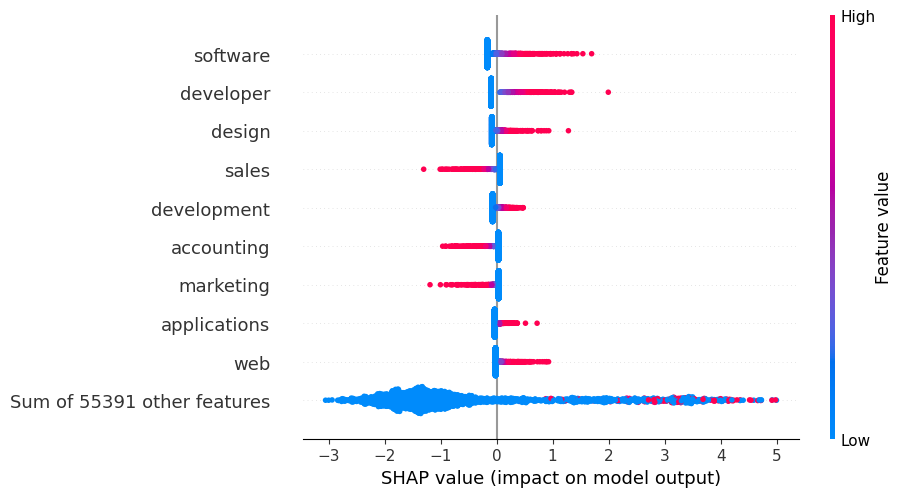

In [159]:
# Global importance (beeswarm) : Most Importnat Words
shap.plots.beeswarm(shap_values, max_display=10)

In [160]:
# df.head(20)

In [161]:
## Local Explaniation (Single Document)
idx = 22
print(test_df.iloc[idx]["full_text"])
print("\n")
print("Is it IT?:", test_df.iloc[idx]["IT"])

credit officer 
 the credit officer will be responsible for
creditworthiness evaluation and analysis and will cross check the
financial documents submitted by the customer to be reviewed during the
loan applications' examination. 
 - actively promote bank loan products;
- responsible for consultancy for customers on required documents, loan
term and conditions;
- collect and verify the financial information submitted by the
customer;
- review and analyse financial statements;
- identify potential customer's needs and their appropriate management;
- monitor the status of applications;
- analyze due diligence data, using financial ratios, client credit
histories, resale value of collateral, etc.;
- prepare and present required reports and documentation to the necessary
signatories;
- evaluate the credit risk of clients before the credit committee;
- educate borrowers and guarantors of their rights and obligations
including all aspects of servicing the loan (repayment schedule and
terms, 

In [162]:
# pd.set_option('display.max_colwidth', None)
# print(test_df.iloc[12])
# pd.reset_option('display.max_colwidth')

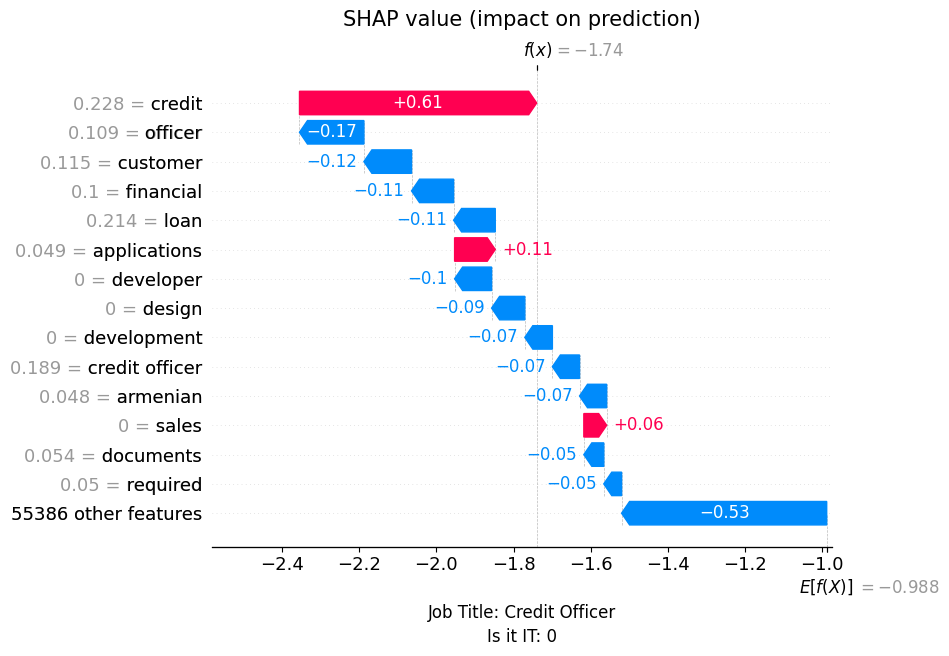

In [163]:
shap.plots.waterfall(shap_values[idx], max_display=15, show=False)

ax = plt.gca()

# Main x-axis label (closer to the axis)
ax.set_xlabel("SHAP value (impact on prediction)", fontsize=15, labelpad=10)

# Second line below the x-axis label
ax.text(
    0.5,
    -0.15,  # below x-axis
    f"Job Title: {test_df.iloc[idx]['Title']}",
    transform=ax.transAxes,
    ha="center",
    fontsize=12,
)

# Optional third line (even lower)
ax.text(
    0.5,
    -0.20,
    f"Is it IT: {test_df.iloc[idx]['IT']}",
    transform=ax.transAxes,
    ha="center",
    fontsize=12,
)

plt.subplots_adjust(bottom=0.35)  # make room at the bottom
plt.show()

In [164]:
# Dependence Plot
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

top_features = (
    pd.Series(mean_abs_shap, index=feature_names).sort_values(ascending=False).head(20)
)

mean_abs_shap_series = pd.Series(mean_abs_shap, index=feature_names)
bottom_features = (
    mean_abs_shap_series[mean_abs_shap_series > 0].sort_values(ascending=True).head(20)
)


print("top_features:", top_features, "\n")
print("bottom_features:", bottom_features)

top_features: software        0.186318
developer       0.149502
design          0.095956
sales           0.085302
development     0.076425
accounting      0.060304
marketing       0.058663
applications    0.047790
web             0.047559
java            0.046241
database        0.045498
project         0.041955
knowledge       0.040062
systems         0.038354
network         0.037113
net             0.035000
programming     0.032996
unit            0.032824
office          0.032433
credit          0.031390
dtype: float64 

bottom_features: cake                    3.814760e-10
ability coach           3.892317e-10
sales departments       8.933678e-10
brand requirements      1.201599e-09
skills data             1.207402e-09
identify appropriate    1.278177e-09
possible extension      3.347685e-09
skills needed           3.428774e-09
data usage              3.704242e-09
hurdles                 3.852507e-09
training computer       3.864555e-09
working schedule        4.057247e-09
control 

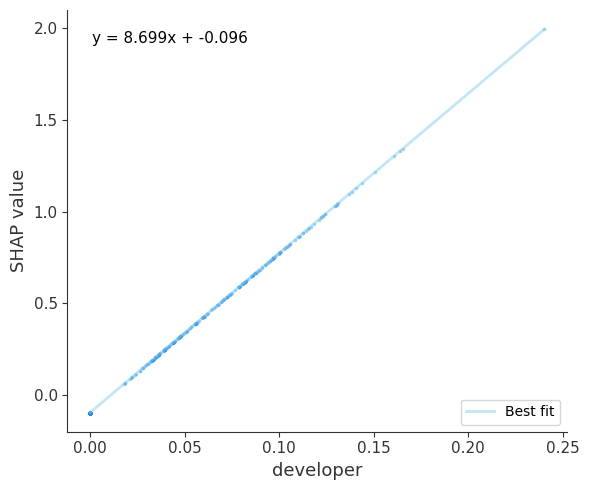

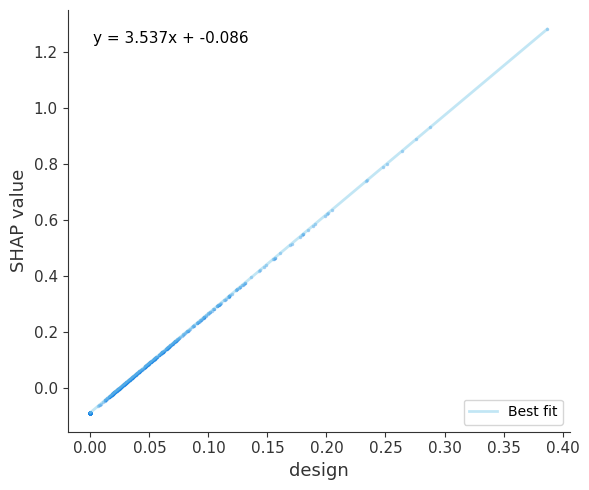

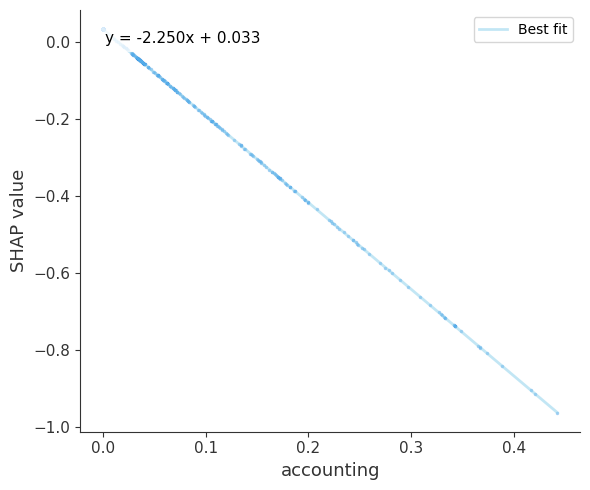

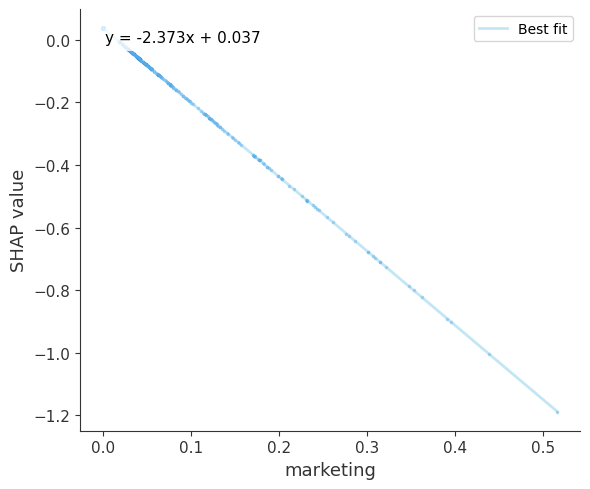

'\nWhen this word appears more (or at all), how does it push the model’s prediction?\n\nEach dot = one job posting in your test set.\nFor each dot:\nX-axis -> value of the feature (word)\nY-axis -> SHAP value = how much that word pushes the prediction\n\nAbove 0 -> pushes toward IT\nBelow 0 -> pushes toward NOT IT\nCloser to 0 -> little influence\n'

In [165]:
def shap_text_dependence(feature, shap_values, X_sparse, feature_names):
    # feature index
    idx = np.where(feature_names == feature)[0][0]

    # X (TF-IDF values)
    X_col = X_sparse[:, idx].toarray().ravel()

    # Y (SHAP values)
    y_shap = shap_values.values[:, idx]

    # SHAP dependence plot
    shap.dependence_plot(
        0,
        y_shap.reshape(-1, 1),
        X_col.reshape(-1, 1),
        feature_names=[feature],
        interaction_index=None,
        alpha=0.4,
        dot_size=6,
        show=False,
    )

    ax = plt.gca()

    # ---- Line of best fit (y = mx + b) ----
    m, b = np.polyfit(X_col, y_shap, 1)

    # Sort X for a clean line
    x_sorted = np.sort(X_col)
    y_fit = m * x_sorted + b

    ax.plot(x_sorted, y_fit, color="skyblue", linewidth=2, label="Best fit", alpha=0.5)

    # Equation on plot
    ax.text(
        0.05,
        0.95,
        f"y = {m:.3f}x + {b:.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=11,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
    )

    ax.set_ylabel("SHAP value")
    ax.legend()

    plt.tight_layout()
    plt.show()


ind = 1
shap_text_dependence(top_features.index[ind], shap_values, X_test_tfidf, feature_names)


ind = 2
shap_text_dependence(top_features.index[ind], shap_values, X_test_tfidf, feature_names)


ind = 5
shap_text_dependence(top_features.index[ind], shap_values, X_test_tfidf, feature_names)


ind = 6
shap_text_dependence(top_features.index[ind], shap_values, X_test_tfidf, feature_names)


"""
When this word appears more (or at all), how does it push the model’s prediction?

Each dot = one job posting in your test set.
For each dot:
X-axis -> value of the feature (word)
Y-axis -> SHAP value = how much that word pushes the prediction

Above 0 -> pushes toward IT
Below 0 -> pushes toward NOT IT
Closer to 0 -> little influence
"""

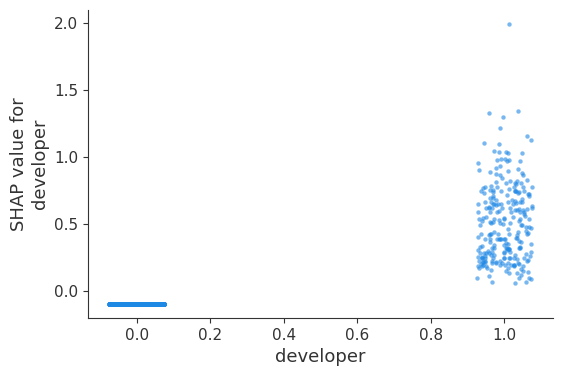

In [166]:
# Binary feature presence plot
fig, ax = plt.subplots(figsize=(6, 4))


def shap_text_dependence_binary(feature, shap_values, X_sparse, feature_names):
    # feature index
    idx = np.where(feature_names == feature)[0][0]

    # binary presence: 1 if feature appears, else 0
    X_bin = (X_sparse[:, idx] > 0).astype(int).toarray().ravel()

    shap.dependence_plot(
        0,
        shap_values.values[:, idx].reshape(-1, 1),
        X_bin.reshape(-1, 1),
        feature_names=[feature],
        interaction_index=None,
        alpha=0.6,
        dot_size=10,
        x_jitter=0.15,  # helps separate 0/1 points
        ax=ax,
    )
    # Now this modifies the same plot
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Absent", "Present"])
    ax.set_xlim(-0.4, 1.4)
    ax.set_ylabel("SHAP value")
    ax.set_xlabel(feature)

    plt.show()


ind = 1
shap_text_dependence_binary(
    top_features.index[ind], shap_values, X_test_tfidf, feature_names
)

# x = 0 -> word absent
# x = 1 -> word present

In [167]:
## LIME (Local, Model-agnostic)

class_names = ["non-IT", "IT"]

lime_explainer = LimeTextExplainer(class_names=class_names, random_state=42)


def predict_proba(texts):
    return text_clf.predict_proba(texts)


exp = lime_explainer.explain_instance(
    test_df.iloc[idx]["full_text"], predict_proba, num_features=10
)

exp.show_in_notebook()

In [168]:
# To save File

html_file = "lime_explanation.html"
exp.save_to_file(html_file)

custom_css = """
<style>
.lime {
    max-height: none !important;
    overflow-y: visible !important;
}
</style>
"""

with open(html_file, "r", encoding="utf-8") as f:
    html = f.read()

html = html.replace("</head>", custom_css + "</head>")

with open(html_file, "w", encoding="utf-8") as f:
    f.write(html)

In [169]:
# Global explainability — model coefficients
# Top positive / negative tokens
tfidf = text_clf.named_steps["tfidf"]
clf = text_clf.named_steps["clf"]

feature_names = np.array(tfidf.get_feature_names_out())
coefs = clf.coef_[0]

TECH_TOKENS = feature_names[np.argsort(coefs)[-20:]]
NON_TECH_TOKENS = feature_names[np.argsort(coefs)[:20]]

print("Top IT tokens:\n", TECH_TOKENS)
print("\nTop non-IT tokens:\n", NON_TECH_TOKENS)

Top IT tokens:
 ['software development' 'php' 'web' 'graphic' 'credit' 'applications'
 'network' 'graphic designer' 'sql' 'development' 'support specialist'
 'programmer' 'credit specialist' 'website' 'unit' 'java' 'design'
 'database' 'software' 'developer']

Top non-IT tokens:
 ['sales' 'marketing' 'accounting' 'office' 'armenian' 'prepare' 'officer'
 'project' 'web designer' 'assistant' 'education' 'procurement' 'legal'
 'activities' 'accountant' 'department' 'manager' 'public' 'program'
 'administrative']


In [170]:
def mask_tokens(texts, tokens):
    pattern = r"\b(" + "|".join(map(re.escape, tokens)) + r")\b"
    return texts.str.replace(pattern, "[MASK]", regex=True)


# Baseline
base_preds = text_clf.predict(val_df["full_text"])
base_acc = accuracy_score(val_df["IT"], base_preds)

In [171]:
top_k = 300  # aggressive

# most positive = strongest IT signal
top_it_features = feature_names[np.argsort(coefs)[-top_k:]]


def mask_feature_list(texts, features):
    pattern = r"\b(" + "|".join(map(re.escape, features)) + r")\b"
    return texts.str.replace(pattern, "", regex=True)


masked_text = mask_feature_list(val_df["full_text"], top_it_features)

masked_preds = text_clf.predict(masked_text)
masked_acc = accuracy_score(val_df["IT"], masked_preds)

print("Accuracy drop (top IT features):", base_acc - masked_acc)

Accuracy drop (top IT features): 0.15744032503809036


In [172]:
# Top NON-IT features (most negative coefficients)
top_non_it_features = feature_names[np.argsort(coefs)[:top_k]]


def mask_feature_list(texts, features):
    pattern = r"\b(" + "|".join(map(re.escape, features)) + r")\b"
    return texts.str.replace(pattern, "", regex=True)


masked_text = mask_feature_list(val_df["full_text"], top_non_it_features)

masked_preds = text_clf.predict(masked_text)
masked_acc = accuracy_score(val_df["IT"], masked_preds)

print("Accuracy drop (top non-IT features):", base_acc - masked_acc)

Accuracy drop (top non-IT features): 0.04062976130015228


In [173]:
## Sanity check
idx = val_df[val_df["IT"] == 1].index[0]
original = val_df.loc[idx, "full_text"]

masked = mask_feature_list(pd.Series([original]), top_it_features).iloc[0]

print("Original pred:", text_clf.predict([original])[0])
print("Masked pred:", text_clf.predict([masked])[0])

Original pred: 1
Masked pred: 0


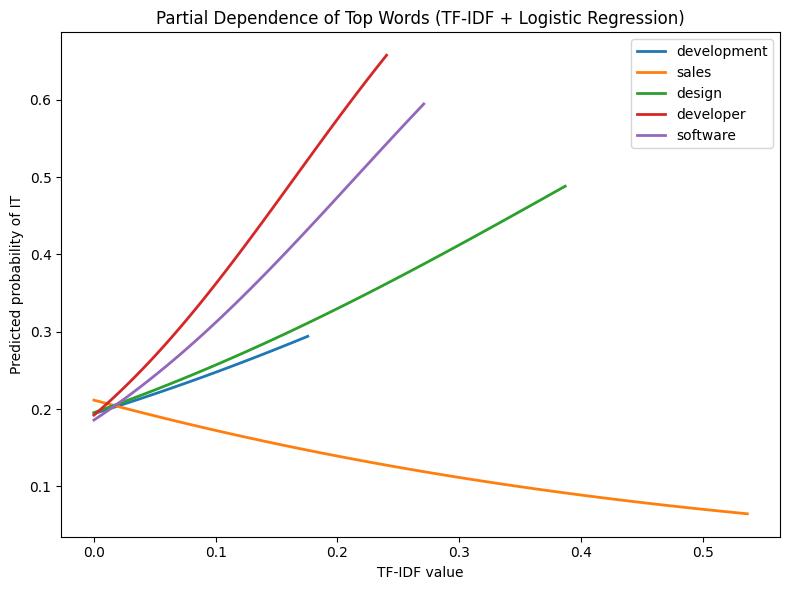

In [174]:
# 1. Select top features by mean absolute SHAP
top_n = 5
top_features = np.abs(shap_values.values).mean(axis=0)
top_feature_names = feature_names[np.argsort(top_features)[-top_n:]]

# 2. Extract model parameters
clf = text_clf.named_steps["clf"]
coefs = clf.coef_[0]
intercept = clf.intercept_[0]

X_dense = X_test_tfidf.toarray()
mean_X = X_dense.mean(axis=0)

# 3. Plot PDPs
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10.colors

for i, feature in enumerate(top_feature_names):
    idx = np.where(feature_names == feature)[0][0]
    beta_j = coefs[idx]

    # Adjusted intercept (partial dependence)
    b = intercept + np.dot(mean_X, coefs) - beta_j * mean_X[idx]

    x_vals = np.linspace(X_dense[:, idx].min(), X_dense[:, idx].max(), 50)

    y_vals = expit(beta_j * x_vals + b)

    plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, label=feature)

plt.xlabel("TF-IDF value")
plt.ylabel("Predicted probability of IT")
plt.title("Partial Dependence of Top Words (TF-IDF + Logistic Regression)")
plt.legend()
plt.tight_layout()
plt.show()

In [175]:
# Partial Dependence
# SHAP shows local/global importance
# PDP shows the average marginal effect across all documents

# see how each feature (word) affects predicted probability, marginalizing over other features.

# Already have mean_abs_shap
top_n = 5
top_features = (
    pd.Series(np.abs(shap_values.values).mean(axis=0), index=feature_names)
    .sort_values(ascending=False)
    .head(top_n)
)

print("Top features:", list(top_features.index))

Top features: ['software', 'developer', 'design', 'sales', 'development']


#### Holistic Stability Score

In [181]:
## ONE HOLISTIC NUMBER: Stability-based Explainability Score

# Stability Score = average Spearman rank correlation between explanation vectors computed on slightly perturbed versions of the same data.

"""
What is the “explanation” for LR?

For Logistic Regression:

Explanation = feature importance

Concretely: absolute coefficient values
"""

importance = np.abs(clf.coef_[0])
tfidf = text_clf.named_steps["tfidf"]
fixed_vocab = tfidf.vocabulary_
vocab_size = len(fixed_vocab)

# Generate perturbations (bootstrap) : do K bootstrap resamples of the training data.


def frozen_tfidf(tfidf):
    return TfidfVectorizer(
        vocabulary=tfidf.vocabulary_,
        ngram_range=tfidf.ngram_range,
        min_df=tfidf.min_df,
        max_df=tfidf.max_df,
        sublinear_tf=tfidf.sublinear_tf,
        norm=tfidf.norm,
    )


K = 10  # minimal but acceptable
coef_list = []

for k in range(K):
    boot_df = resample(
        train_df, replace=True, n_samples=len(train_df), random_state=42 + k
    )

    boot_clf = Pipeline(
        [
            ("tfidf", frozen_tfidf(tfidf)),  # 🔒 frozen vocab
            ("clf", LogisticRegression(max_iter=500, class_weight=class_weight)),
        ]
    )

    boot_clf.fit(boot_df["full_text"], boot_df["IT"])

    coefs = np.abs(boot_clf.named_steps["clf"].coef_[0])

    assert coefs.shape[0] == vocab_size  # sanity check
    coef_list.append(coefs)

In [182]:
# Compute stability (Spearman correlation)


def mean_spearman(vectors):
    corrs = []
    for i in range(len(vectors)):
        for j in range(i + 1, len(vectors)):
            corr, _ = spearmanr(vectors[i], vectors[j])
            corrs.append(corr)
    return np.mean(corrs)


lr_stability = mean_spearman(coef_list)
lr_stability

np.float64(0.8577297310643535)

## CNN

In [183]:
import html
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import HTML
from sklearn.utils import resample
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm.auto import tqdm


MAX_VOCAB = 30000
MAX_LEN = 512

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<UNK>")

tokenizer.fit_on_texts(train_df["full_text"])

X_train_seq = tokenizer.texts_to_sequences(train_df["full_text"])
X_val_seq = tokenizer.texts_to_sequences(val_df["full_text"])
X_test_seq = tokenizer.texts_to_sequences(test_df["full_text"])

X_train_pad = pad_sequences(
    X_train_seq, maxlen=MAX_LEN, padding="post", truncating="post"
)
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN, padding="post", truncating="post")
X_test_pad = pad_sequences(
    X_test_seq, maxlen=MAX_LEN, padding="post", truncating="post"
)

In [184]:
EMB_DIM = 100

inputs = layers.Input(shape=(MAX_LEN,), name="input_ids")

x = layers.Embedding(
    input_dim=MAX_VOCAB,
    output_dim=EMB_DIM,
    input_length=MAX_LEN,
    mask_zero=True,
    name="embedding",
)(inputs)

x = layers.Conv1D(filters=128, kernel_size=5, activation="relu")(x)

x = layers.GlobalMaxPooling1D()(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs=inputs, outputs=outputs)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [185]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    X_train_pad,
    train_df["IT"].values,
    validation_data=(X_val_pad, val_df["IT"].values),
    epochs=3,
    batch_size=32,
    class_weight=class_weight,
    verbose=1,
)

Epoch 1/3
288/288 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.7843 - loss: 0.4951 - val_accuracy: 0.9345 - val_loss: 0.1647
Epoch 2/3
288/288 ━━━━━━━━━━━━━━━━━━━━ 27s 94ms/step - accuracy: 0.9567 - loss: 0.1239 - val_accuracy: 0.9589 - val_loss: 0.0954
Epoch 3/3
288/288 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step - accuracy: 0.9867 - loss: 0.0434 - val_accuracy: 0.9716 - val_loss: 0.0814


In [186]:
loss, acc = model.evaluate(X_test_pad, test_df["IT"].values)
print("Test accuracy:", acc)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9733 - loss: 0.0706
Test accuracy: 0.9710512757301331


In [187]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 100)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 508, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,217,349 (35.16 MB)

 Trainable params: 3,072,449 (11.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,144,900 (23.44 MB)

In [188]:
# Gradient-based saliency

# This gives token-level importance, which LR cannot.
# Compute gradient of model output w.r.t. embedding vectors
# Aggregate gradient magnitude per token


def compute_saliency_embeddings(embedding_model, input_ids):
    """
    Computes gradient-based saliency scores per token.

    Args:
        embedding_model: model returning (embeddings, prediction)
        input_ids: padded input sequence, shape (MAX_LEN,)

    Returns
    -------
        saliency scores, shape (MAX_LEN,)
    """
    input_ids = tf.convert_to_tensor(input_ids[None, :])  # (1, MAX_LEN)

    with tf.GradientTape() as tape:
        embeddings, prediction = embedding_model(input_ids)
        tape.watch(embeddings)
        loss = prediction[:, 0]

    grads = tape.gradient(loss, embeddings)  # (1, MAX_LEN, EMB_DIM)

    # L2 norm across embedding dimensions → token importance
    # saliency = tf.norm(grads, axis=-1).numpy()[0]
    saliency = tf.reduce_sum(grads * embeddings, axis=-1)[0].numpy()

    return saliency


# Create a model that outputs embeddings + prediction
embedding_layer = model.get_layer("embedding")

embedding_model = tf.keras.Model(
    inputs=model.input, outputs=[embedding_layer.output, model.output]
)

# Compute saliency for one example
idx = np.where(test_df["IT"].values == 1)[0][7]

saliency = compute_saliency_embeddings(embedding_model, X_test_pad[idx])

seq = X_test_seq[idx]
tokens = tokenizer.sequences_to_texts([seq])[0].split()

sal = saliency[: len(tokens)]

# Normalize for visualization (robust)
max_abs = np.max(np.abs(sal)) + 1e-8
sal_norm = sal / max_abs

In [189]:
sal.mean(), sal.max()  # sanity check ; non-zero saliency

(np.float32(0.00025650967), np.float32(0.015693916))

In [190]:
top = sorted(zip(tokens, sal), key=lambda x: x[1], reverse=True)[:10]
top  # sanity check ; top influenctial tokens

[('software', np.float32(0.015693916)),
 ('engineer', np.float32(0.014042093)),
 ('administrator', np.float32(0.006535604)),
 ('software', np.float32(0.0012396809)),
 ('systems', np.float32(0.000917534)),
 ('software', np.float32(0.00052734674)),
 ('hardware', np.float32(0.00039140676)),
 ('writing', np.float32(0.00034918386)),
 ('software', np.float32(0.00032416976)),
 ('hardware', np.float32(0.00031142076))]

In [191]:
def saliency_html(tokens, scores):
    html = ""
    for tok, score in zip(tokens, scores):
        if score > 0:
            color = f"rgba(0, 0, 255, {abs(score):.1f})"  # blue
        else:
            color = f"rgba(255, 0, 0, {abs(score):.1f})"  # red

        html += f'<span style="background-color:{color}; padding:2px; margin:1px;">{tok}</span> '

    return HTML(html)


saliency_html(tokens, sal_norm)

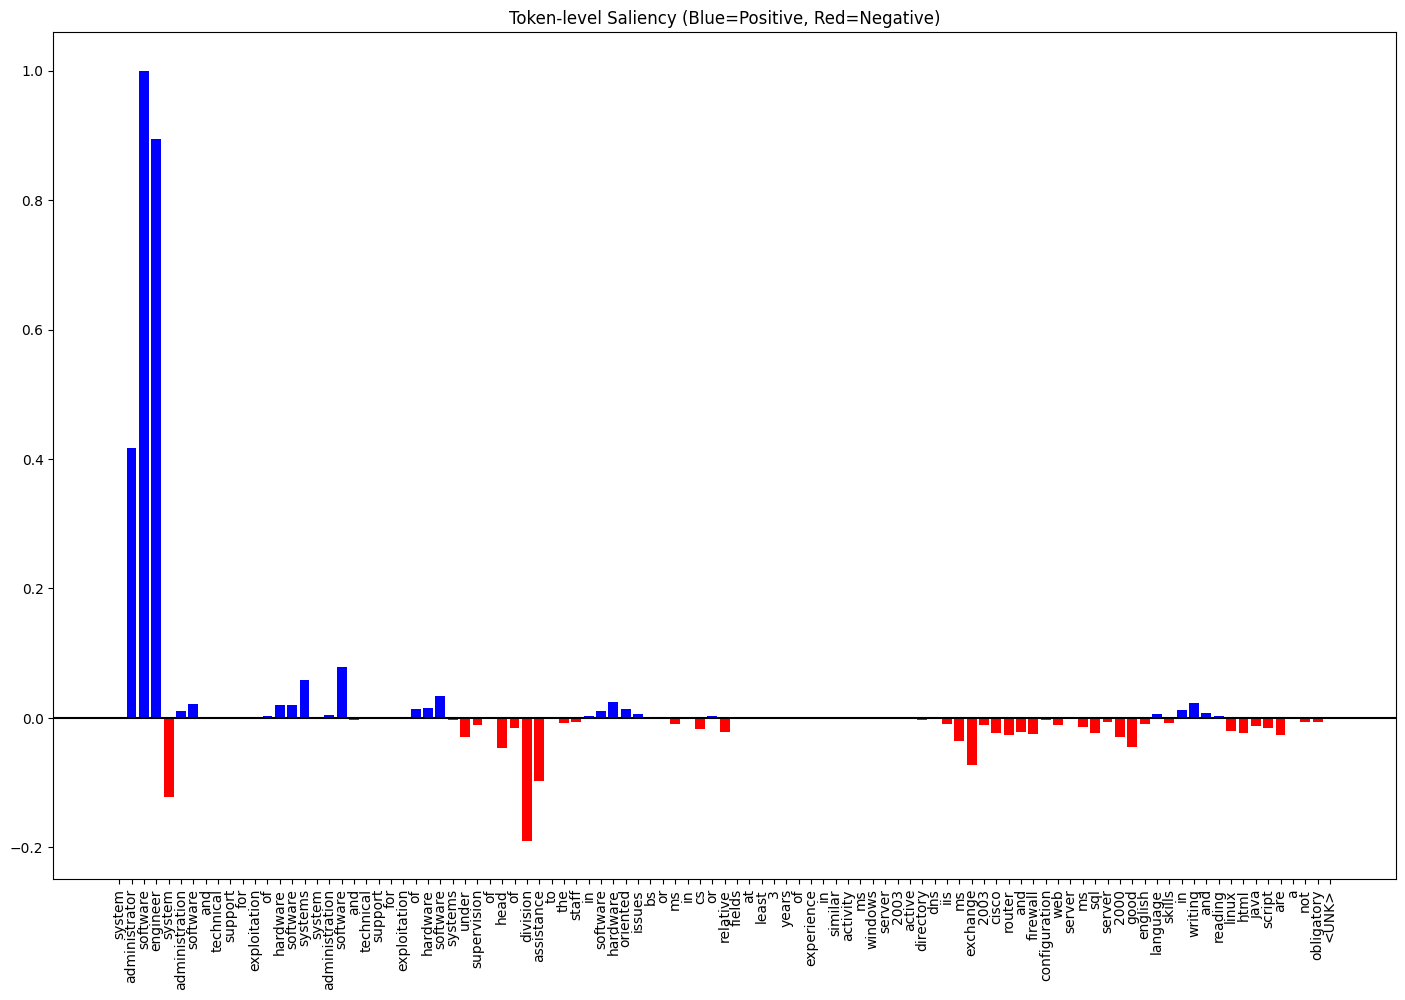

In [192]:
plt.figure(figsize=(len(tokens) * 0.175, 11))
plt.bar(
    range(len(tokens)), sal_norm, color=["blue" if s > 0 else "red" for s in sal_norm]
)
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.axhline(0, color="black")
plt.title("Token-level Saliency (Blue=Positive, Red=Negative)")

# Save the figure to a file
plt.savefig("Sailency_Spreaded.png")

plt.show()

In [193]:
## Top Activating n-grams per Filter (GLOBAL)

# Model that outputs convolution activations
conv_layer = model.get_layer(index=2)  # Conv1D layer
conv_model = tf.keras.Model(inputs=model.input, outputs=conv_layer.output)

conv_outputs = conv_model.predict(X_test_pad)
# shape: (num_docs, seq_len - kernel_size + 1, num_filters)

# Extract top n-grams
kernel_size = conv_layer.kernel_size[0]
index_to_word = {v: k for k, v in tokenizer.word_index.items()}

top_ngrams = []

for doc_idx in range(len(X_test_pad)):
    for pos in range(conv_outputs.shape[1]):
        for f in range(conv_outputs.shape[2]):
            activation = conv_outputs[doc_idx, pos, f]
            if activation > 0:
                tokens = X_test_pad[doc_idx][pos : pos + kernel_size]
                words = [index_to_word.get(t, "<UNK>") for t in tokens if t != 0]
                if words:
                    top_ngrams.append((" ".join(words), activation))

# aggregate globally

df_ngrams = pd.DataFrame(top_ngrams, columns=["ngram", "activation"])
global_ngrams = (
    df_ngrams.groupby("ngram")["activation"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

global_ngrams_rev = (
    df_ngrams.groupby("ngram")["activation"].mean().sort_values(ascending=True).head(20)
)

print(global_ngrams)
print(global_ngrams_rev)

 7/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
ngram
software developer software developer will    0.581506
database developer the database developer     0.569446
developer software developer will develop     0.564172
database developer altacode llc is            0.536388
software developer boomerang software llc     0.527264
software developer linkgard systems llc       0.523107
java developer the java developer             0.522732
java developer damaris am llc                 0.521111
sql database developer altacode llc           0.508800
software developer sourcio is seeking         0.503806
developer software test developer will        0.502361
software developer this position requires     0.494712
software developer altacode llc is            0.489040
java software developer sourcio cjsc          0.486186
database developer synergy armenia is         0.485232
java developer epam systems inc               0.485228
developer the database developer will         0.476433
software developer 

In [194]:
### HOLISTIC NUMBER -- STABILITY
def compute_signed_saliency(embedding_model, input_ids):
    input_ids = tf.convert_to_tensor(input_ids[None, :])

    with tf.GradientTape() as tape:
        embeddings, prediction = embedding_model(input_ids)
        tape.watch(embeddings)
        loss = prediction[:, 0]

    grads = tape.gradient(loss, embeddings)
    saliency = tf.reduce_sum(grads * embeddings, axis=-1).numpy()[0]

    return saliency


# Build embedding→output model
embedding_model = tf.keras.Model(
    inputs=model.input, outputs=[model.get_layer("embedding").output, model.output]
)

In [195]:
# Choose a fixed evaluation set (important!)
EVAL_N = 30  # Small, fixed subset to keep things comparable
eval_idx = np.random.choice(len(X_val_pad), EVAL_N, replace=False)
X_eval = X_val_pad[eval_idx]

In [ ]:
# Bootstrap + explanation vectors

K = 3  # Keep it small, CNN expensive
explanation_vectors = []

for k in range(K):
    boot_idx = resample(
        np.arange(len(X_train_pad)),
        replace=True,
        n_samples=len(X_train_pad),
        random_state=42 + k,
    )

    X_boot = X_train_pad[boot_idx]
    y_boot = train_df["IT"].values[boot_idx]

    # reinitialize model
    cnn = tf.keras.models.clone_model(model)
    cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    cnn.fit(
        X_boot, y_boot, epochs=3, batch_size=32, class_weight=class_weight, verbose=0
    )

    emb_model = tf.keras.Model(
        inputs=cnn.input, outputs=[cnn.get_layer("embedding").output, cnn.output]
    )

    # aggregate saliency
    saliency_sum = np.zeros(MAX_LEN)

    for x in tqdm(X_eval, desc="Computing saliency"):
        sal = compute_signed_saliency(embedding_model, x)
        saliency_sum += np.abs(sal)

    explanation_vectors.append(saliency_sum / len(X_eval))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
# # Each element of explanation_vectors is:
# # → same dimensionality → comparable.
# shape = (MAX_LEN,)

In [ ]:
# Choose a fixed evaluation set, Use a fixed subset to control variance.

N = 100  # minimal but sufficient
idxs = np.random.RandomState(42).choice(len(X_val_pad), N, replace=False)


# Get global saliency vector (one run)
def global_saliency_vector(model, X_pad, idxs):
    from collections import defaultdict

    token_scores = defaultdict(list)

    for idx in idxs:
        sal = compute_saliency_embeddings(model, X_pad[idx])
        tokens = tokenizer.sequences_to_texts([X_pad[idx]])[0].split()

        for tok, score in zip(tokens, sal):
            if tok not in ["<PAD>", "<UNK>"]:
                token_scores[tok].append(score)

    return {tok: np.mean(scores) for tok, scores in token_scores.items()}

In [ ]:
# Perturbations
# We perturb by retraining with different seeds (minimal + fair).


def build_embedding_model(model):
    return tf.keras.Model(
        inputs=model.input, outputs=[model.get_layer("embedding").output, model.output]
    )


def build_classifier_from_embeddings(model):
    embedding_output = model.get_layer("embedding").output
    x = embedding_output

    for layer in model.layers:
        if layer.name in ["embedding", "input_ids"]:
            continue
        x = layer(x)

    return tf.keras.Model(inputs=model.input, outputs=x)


def build_cnn_model(max_len=MAX_LEN, max_vocab=MAX_VOCAB, emb_dim=EMB_DIM):
    inputs = layers.Input(shape=(max_len,), name="input_ids")

    embeddings = layers.Embedding(
        input_dim=max_vocab,
        output_dim=emb_dim,
        mask_zero=False,  # IMPORTANT: Conv1D ignores masks anyway
        name="embedding",
    )(inputs)

    x = layers.Conv1D(128, 5, activation="relu")(embeddings)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model


def compute_signed_saliency(embedding_model, input_ids):
    input_ids = tf.convert_to_tensor(input_ids[None, :])

    with tf.GradientTape() as tape:
        embeddings, prediction = embedding_model(input_ids)
        tape.watch(embeddings)
        loss = prediction[:, 0]

    grads = tape.gradient(loss, embeddings)
    saliency = tf.reduce_sum(grads * embeddings, axis=-1)

    return saliency.numpy()[0]


def global_saliency_vector(embedding_model, X_pad, idxs, tokenizer):
    token_scores = defaultdict(list)

    for idx in idxs:
        sal = compute_signed_saliency(embedding_model, X_pad[idx])
        tokens = tokenizer.sequences_to_texts([X_pad[idx]])[0].split()

        for tok, score in zip(tokens, sal):
            if tok not in ["<PAD>", "<UNK>"]:
                token_scores[tok].append(abs(score))

    return {tok: np.mean(scores) for tok, scores in token_scores.items()}

In [ ]:
K = 5
saliency_vectors = []

idxs = np.random.RandomState(42).choice(len(X_val_pad), 100, replace=False)

for seed in range(K):
    tf.keras.utils.set_random_seed(42 + seed)

    model = build_cnn_model()
    model.fit(
        X_train_pad,
        train_df["IT"].values,
        epochs=3,
        batch_size=32,
        class_weight=class_weight,
        verbose=0,
    )

    emb_model = build_embedding_model(model)
    sal_vec = global_saliency_vector(emb_model, X_val_pad, idxs, tokenizer)
    saliency_vectors.append(sal_vec)

In [ ]:
def spearman_between_dicts(d1, d2):
    common = sorted(set(d1) & set(d2))
    v1 = [d1[k] for k in common]
    v2 = [d2[k] for k in common]
    return spearmanr(v1, v2).correlation


corrs = []
for i in range(K):
    for j in range(i + 1, K):
        corrs.append(spearman_between_dicts(saliency_vectors[i], saliency_vectors[j]))

stability_score = np.mean(corrs)
print("CNN explanation stability:", stability_score)

In [ ]:
PAD_ID = 0  # pad_sequences default
baseline = np.zeros_like(X_test_pad[0])


def integrated_gradients(model, x, baseline, steps=50):
    """
    model: trained keras model
    x: padded token ids, shape (MAX_LEN,)
    baseline: padded baseline ids, same shape
    """
    x = tf.convert_to_tensor(x[None, :], dtype=tf.int32)
    baseline = tf.convert_to_tensor(baseline[None, :], dtype=tf.int32)

    # embeddings
    embedding_layer = model.get_layer("embedding")

    x_embed = embedding_layer(x)
    base_embed = embedding_layer(baseline)

    # interpolate embeddings
    alphas = tf.linspace(0.0, 1.0, steps)

    integrated_grads = tf.zeros_like(x_embed)

    for alpha in alphas:
        with tf.GradientTape() as tape:
            interp = base_embed + alpha * (x_embed - base_embed)
            tape.watch(interp)

            y = interp
            for layer in model.layers[2:]:
                y = layer(y, training=False)

            prob = y[:, 0]
            logit = tf.math.log(prob + 1e-8) - tf.math.log(1 - prob + 1e-8)

        grads = tape.gradient(logit, interp)
        integrated_grads += grads

    avg_grads = integrated_grads / steps
    ig = tf.reduce_sum(avg_grads * (x_embed - base_embed), axis=-1)

    return ig.numpy()[0]

In [ ]:
idx = np.where(test_df["IT"].values == 1)[0][15]

saliency = integrated_gradients(
    model, X_test_pad[idx], baseline=np.zeros_like(X_test_pad[idx]), steps=50
)

seq = X_test_seq[idx]
tokens = tokenizer.sequences_to_texts([seq])[0].split()

sal = saliency[: len(tokens)]
sal = sal / (np.max(np.abs(sal)) + 1e-8)

render_saliency_diverging(tokens, sal)

"""
Computed token-level attributions using Integrated Gradients in embedding space, 
with a zero (PAD) embedding baseline. Gradients are taken with respect to the 
positive-class logit to avoid saturation effects. This approach yields signed 
token attributions indicating contributions toward IT or non-IT predictions.
"""

#### Extras

In [ ]:
# Batch Integrated Gradients over the dataset
def compute_ig_for_indices(model, X_pad, X_seq, indices, steps=50):
    """
    Returns list of (tokens, saliency) for given indices
    """
    results = []

    for idx in indices:
        saliency = integrated_gradients(
            model, X_pad[idx], baseline=np.zeros_like(X_pad[idx]), steps=steps
        )

        seq = X_seq[idx]
        tokens = tokenizer.sequences_to_texts([seq])[0].split()

        sal = saliency[: len(tokens)]
        results.append((tokens, sal))

    return results


# Split IT vs Non-IT samples :: only sampling 300
IT_indices = np.where(test_df["IT"].values == 1)[0][:300]
nonIT_indices = np.where(test_df["IT"].values == 0)[0][:300]

it_results = compute_ig_for_indices(model, X_test_pad, X_test_seq, IT_indices)

nonit_results = compute_ig_for_indices(model, X_test_pad, X_test_seq, nonIT_indices)

In [ ]:
# Aggregate saliency per token, building token → list of saliency values.


def aggregate_token_saliency(results):
    token_to_scores = defaultdict(list)

    for tokens, sal in results:
        for t, s in zip(tokens, sal):
            token_to_scores[t].append(s)

    return token_to_scores


it_token_scores = aggregate_token_saliency(it_results)
nonit_token_scores = aggregate_token_saliency(nonit_results)

In [ ]:
# Build a comparison table
# Only keep tokens that appear often enough to be meaningful

import numpy as np
import pandas as pd


MIN_COUNT = 20

rows = []

all_tokens = set(it_token_scores) | set(nonit_token_scores)

for tok in all_tokens:
    it_vals = it_token_scores.get(tok, [])
    nonit_vals = nonit_token_scores.get(tok, [])

    if len(it_vals) < MIN_COUNT or len(nonit_vals) < MIN_COUNT:
        continue

    rows.append(
        {
            "token": tok,
            "it_mean": np.mean(it_vals),
            "nonit_mean": np.mean(nonit_vals),
            "it_count": len(it_vals),
            "nonit_count": len(nonit_vals),
            "diff": np.mean(it_vals) - np.mean(nonit_vals),
        }
    )

df = pd.DataFrame(rows).sort_values("diff", ascending=False)  # directional bias scores

In [ ]:
# Statistical significance (Welch’s t-test)

from scipy.stats import ttest_ind


pvals = []

for _, row in df.iterrows():
    tok = row["token"]

    it_vals = it_token_scores[tok]
    nonit_vals = nonit_token_scores[tok]

    t, p = ttest_ind(it_vals, nonit_vals, equal_var=False)
    pvals.append(p)

df["p_value"] = pvals
df["abs_diff"] = np.abs(df["diff"])

In [ ]:
# Tokens pushing toward IT
df.sort_values("diff", ascending=False).head(15)

In [ ]:
# Tokens pushing toward Non-IT
df.sort_values("diff").head(15)